# Background

The even Zernike polynomials are defined on as follows

$
Z_n^m(\rho,\phi) = R_n^m(\rho) \cos(m\phi)
$

the odd ones 

$
Z_n^{-m}(\rho,\phi) = R_n^m(\rho) \sin(m\phi)
$

where $m$ and $n$ are nonnegative integers with $n\ge m$, $\rho$ is the radius and limited to $0\le\rho\le1$. 
The odd and even refer to the symmetry in the function and not the integer $m$. 
The radial polynomials are defined as

\begin{equation}
R_n^m(\rho)=\sum_{k=0}^{\frac{n-m}{2}} \frac{(-1)^k (n-k)!}{k!(\frac{n+m}{2}-k)!(\frac{n-m}{2}-k)!} \rho^{n-2k}
\end{equation}

for $n-m$ is even and $R_n^m=0$ when $n-m$ is odd.

The OSA/ANSI stadard indices for Zernike polynomials is 

\begin{equation}
j = \frac{n(n+2)+m}{2}
\end{equation}

The orthogonality condition when integrating over the unit disk is 

\begin{equation}
\int Z_n^m(\rho,\phi) Z_{n'}^{m'}(\rho,\phi) d^2r = \frac{\epsilon_m \pi}{2n+2} \delta_{n,n'} \delta_{m,m'}
\end{equation}

where $d^2r = \rho d\rho d\phi$ and where $n-m$ and $n'-m'$ are even. The Neumann factor $\epsilon_m$ is defined as $2$ if $m=0$ and $1$ if $m\ne0$

We can decompose a phase $\Phi(\rho,\phi)$ into Zernike coefficients

\begin{equation}
\Phi(\rho,\phi) = \sum_{n=0}^{\infty} \sum_{n=m} \left[ a_{m,n} Z_{n}^{m}(\rho,\phi) +b_{m,n} Z_{n}^{-m}(\rho,\phi) \right]
\end{equation}

\begin{equation}
a_{m,n} = \frac{2n+2}{\epsilon_m \pi} \int \Phi(\rho,\psi) Z_{n}^{m}(\rho,\psi) \rho d\rho d\phi
\end{equation}

\begin{equation}
b_{m,n} = \frac{2n+2}{\epsilon_m \pi} \int \Phi(\rho,\psi) Z_{n}^{-m}(\rho,\psi) \rho d\rho d\phi
\end{equation}

[1] https://en.wikipedia.org/wiki/Zernike_polynomials

# Restart Kernal

In [ ]:
import os
os._exit(00)

# How to Create Coordinates and Make 2D Plot 

<IPython.core.display.Javascript object>


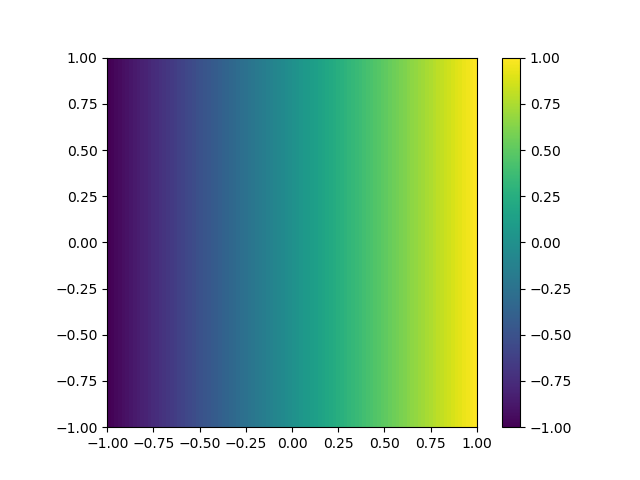

<IPython.core.display.Javascript object>


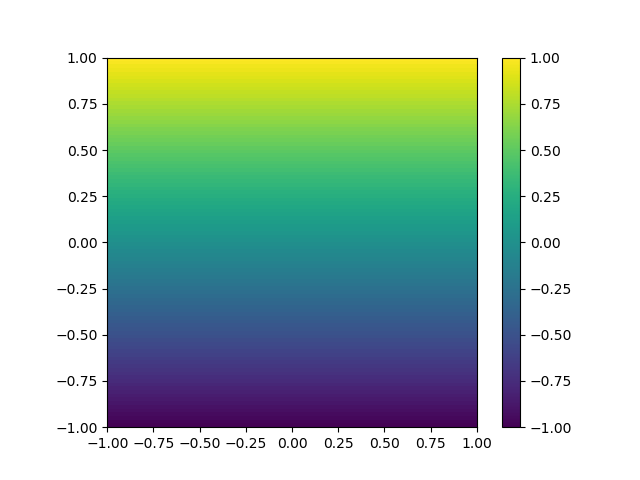

<IPython.core.display.Javascript object>


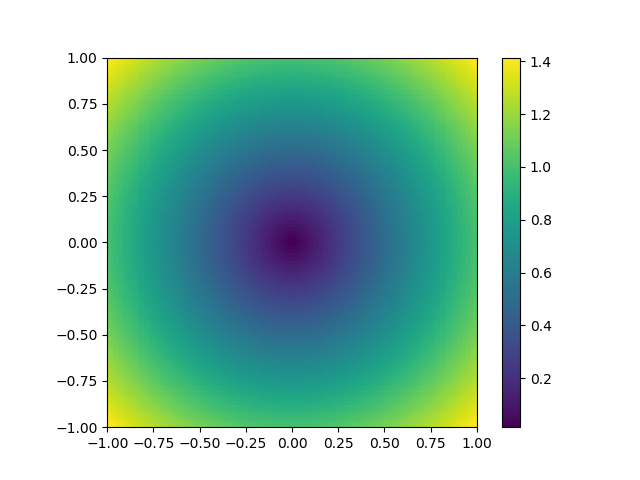

<IPython.core.display.Javascript object>


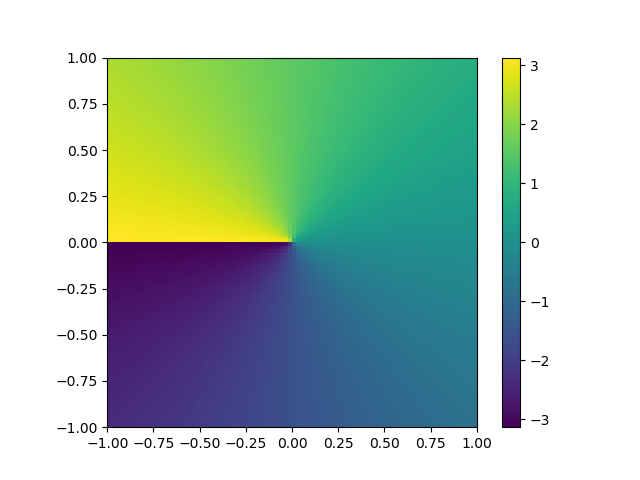

In [2]:
import scipy as sp
import matplotlib.pylab as plt
%matplotlib notebook

radius = 1
resolution = 100
x = sp.linspace(-radius,radius,resolution)
y = sp.linspace(-radius,radius,resolution)
X,Y = sp.meshgrid(x,y)
rho = sp.sqrt(X**2+Y**2)
phi = sp.arctan2(Y,X)

plt.figure()
plt.imshow(X,origin='lower',extent=[-1,1,-1,1])
plt.colorbar()

plt.figure()
plt.imshow(Y,origin='lower',extent=[-1,1,-1,1])
plt.colorbar()

plt.figure()
plt.imshow(rho,origin='lower',extent=[-1,1,-1,1])
plt.colorbar()

plt.figure()
plt.imshow(phi,origin='lower',extent=[-1,1,-1,1])
plt.colorbar()

<IPython.core.display.Javascript object>


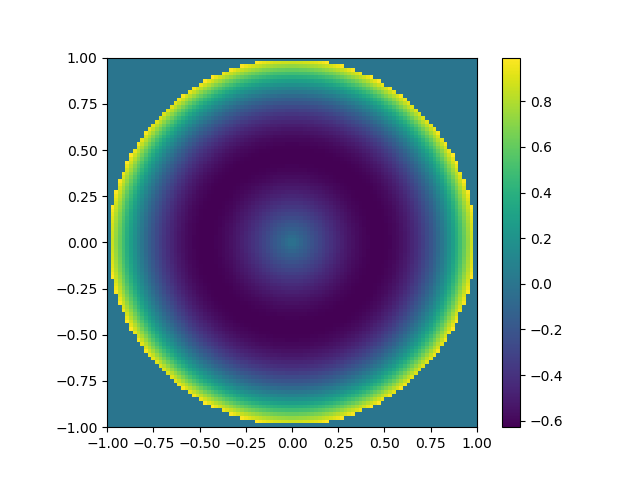

In [75]:
plt.figure()
plt.imshow(zernike.RadialZernike(rho,3,1,outside=0.0),extent=[-1,1,-1,1])
plt.colorbar()

<IPython.core.display.Javascript object>


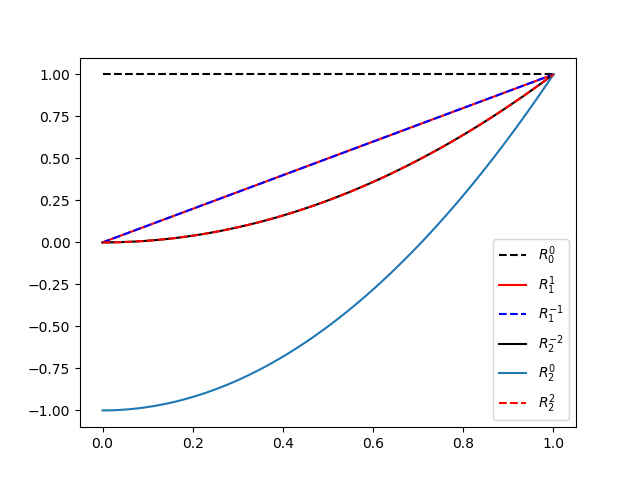

In [58]:
r=sp.linspace(0,1,100)
plt.figure()
plt.plot(r,zernike.RadialZernike(r,0,0,outside=0.0),'k--',label="$R_0^0$")
plt.plot(r,zernike.RadialZernike(r,1,-1,outside=0.0),'r-',label="$R_1^{1}$")
plt.plot(r,zernike.RadialZernike(r,1,1,outside=0.0),'b--',label="$R_1^{-1}$")
plt.plot(r,zernike.RadialZernike(r,2,-2,outside=0.0),'k-',label="$R_2^{-2}$")
plt.plot(r,zernike.RadialZernike(r,2,0,outside=0.0),'-',label="$R_2^{0}$")
plt.plot(r,zernike.RadialZernike(r,2,2,outside=0.0),'r--',label="$R_2^{2}$")


plt.legend()

In [ ]:
zernike.AngularZernike(phi,m)

# Show Zernike Polynomials

<IPython.core.display.Javascript object>


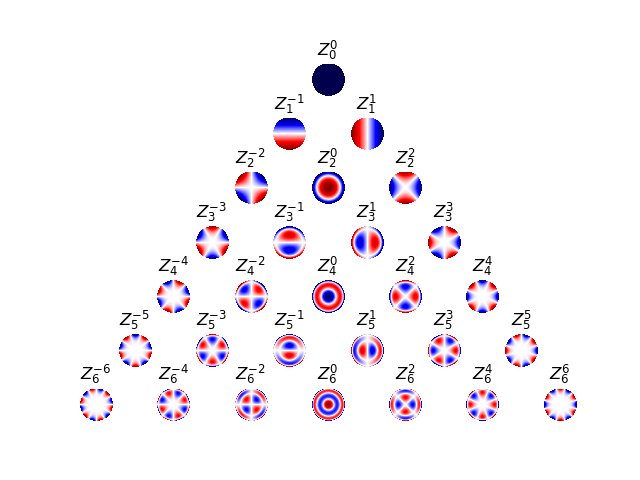

In [2]:
import matplotlib.pylab as plt
%matplotlib notebook
import scipy as sp
from zernike import zernike


Resolution=1024
nmax = 6;

x = sp.linspace(-1,1,Resolution);
y = sp.linspace(-1,1,Resolution);
X,Y = sp.meshgrid(x,y)
R = sp.sqrt(X**2+Y**2);
phi = sp.arctan2(Y,X)

f, ax = plt.subplots(nmax+1,2*nmax+1)

for i in range(nmax+1):
    for j in range(2*nmax+1):
        ax[i,j].axis('off')
        
for n in range(nmax+1): # go up to nmax
    for m in range(-n,n+1): #range from -n to n
        if (n-m) % 2 == 0: # is even?
            ax[n,nmax+m].imshow(zernike.Zernike(R,phi,n,m,outside=sp.nan),vmin=-1,vmax=1,cmap=plt.cm.seismic_r, origin='lower')
            # Title with n,m index
            ax[n,nmax+m].set_title("$Z_{%g}^{%g}$"%(n,m))
            # Title with OSA Index
            #ax[n,nmax+m].set_title("%g"%(OSAindex(n,m)))

# Calculate A Zernike Coefficient

# Zernike Coefficients for Ideal Spherical Lens